# Network-Based Louvain Community Detection

### Introduction

This project applies a network-based bioinformatics approach to RNA-seq gene expression data from primary and matched metastatic breast tumors (GSE209998). By constructing a correlation-based gene network and using Louvain community detection, the analysis aims to identify co-expressed gene modules and explore underlying patterns in complex gene expression data using Python.

This work was developed by adapting an exercise from the Coursera course *Introduction to Bioinformatics* offered by the Birla Institute of Technology & Science (BITS), Pilani.

### Importing Required Libraries
This cell imports the essential Python libraries used throughout the bioinformatics analysis:

- **pandas** and **numpy** are used for loading, cleaning, and manipulating numerical and tabular biological data.
- **seaborn** and **matplotlib** provide tools for data visualization, enabling exploratory analysis and clear presentation of results.
- **networkx** is used to construct and analyze biological networks, such as gene or protein interaction networks.
- **community_louvain** implements the Louvain algorithm for community detection, which helps identify clusters or modules within biological networks.
- **pdist** and **squareform** from `scipy.spatial.distance` are used to compute pairwise distances and convert them into matrix form, which is useful for similarity analysis and network construction.

In [2]:
## For data loading
import pandas as pd
import numpy as np

# For Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# For performing community detetcion
import networkx as nx
from community import community_louvain
from scipy.spatial.distance import pdist, squareform

## Create Correlation Network

### Defining a Function to Create a Correlation Network

A function that constructs a **correlation-based network** from gene expression data is defined.

- The function computes a **correlation matrix** using NumPy to quantify pairwise similarity between expression profiles.
- A **NetworkX graph** is initialized, where each node represents a gene (or feature) from the dataset.
- Edges are added between pairs of genes whose absolute correlation value exceeds a specified **threshold**, indicating strong positive or negative association.
- The **edge weight** stores the strength of the correlation, which can be used in downstream network analysis such as community detection.
- The function returns a graph structure suitable for identifying gene modules or interaction patterns in bioinformatics studies.

In [3]:
def create_correlation_network(data, threshold=0.7):

    # Calculate correlation matrix
    corr_matrix = np.corrcoef(data)
    
    # Create network
    G = nx.Graph()
    
    # Add nodes
    for i in range(len(data.T.columns)):
        G.add_node(data.T.columns[i])
    
    # Add edges based on correlation threshold
    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            if abs(corr_matrix[i,j]) >= threshold:
                G.add_edge(data.T.columns[i], data.T.columns[j], 
                          weight=abs(corr_matrix[i,j]))
    
    return G

## Louvain Community Detection

### Performing Louvain Community Detection

A function that applies the **Louvain community detection algorithm** to a biological network is defined.

- The function takes a **NetworkX graph** as input, where nodes typically represent genes or proteins and edges represent their relationships.
- The **resolution parameter** controls the granularity of the detected communities, allowing identification of either larger modules or finer sub-clusters.
- The Louvain algorithm optimizes **modularity** to group highly connected nodes into communities.
- The function returns a **dictionary of community assignments**, mapping each node to its detected cluster, which can be used to identify biologically meaningful modules.


In [4]:
def perform_louvain_clustering(G, resolution=1.0):
    communities = community_louvain.best_partition(G, resolution=resolution)
    return communities

## Computing Modularity Score

### Evaluating Clustering Quality with Modularity

It defines a function to assess the quality of network clustering using **modularity**:

- The function takes a **network graph** and its corresponding **community assignments** as inputs.
- **Modularity** measures how well the network is partitioned into communities by comparing the density of edges within communities to edges between communities.
- A higher modularity score indicates more well-defined and biologically meaningful network modules.
- The function returns a single **numerical score** that can be used to compare different clustering results or parameter settings.


In [5]:
def evaluate_clustering(G, communities):
    modularity = community_louvain.modularity(communities, G)
    return modularity

## Graph for Visualizing Communities

### Visualizing the Network and Detected Communities

It is a function to **visualize the correlation network** with community structure highlighted:

- A plotting figure is created to clearly display the network structure.
- Each node is colored according to its **Louvain community assignment**, allowing easy visual identification of clusters.
- The **spring layout algorithm** is used to position nodes so that highly connected nodes appear closer together.
- Network edges and nodes are drawn with adjustable size, transparency, and color mapping for readability.
- The resulting plot provides an intuitive way to explore **gene modules and interaction patterns** identified through network-based clustering.

In [6]:
def plot_network(G, communities):
    plt.figure(figsize=(12, 12))
    
    # Set node colors based on communities
    colors = [communities[node] for node in G.nodes()]
    
    # Calculate node positions
    pos = nx.spring_layout(G)
    
    # Draw network
    nx.draw(G, pos,
           node_color=colors,
           node_size=100,
           cmap=plt.cm.tab20,
           edge_color='gray',
           alpha=0.7,
           with_labels=True,
           font_size=8)
    
    plt.title("Louvain Communities in Sample Correlation Network")
    plt.show()

## Main Function

### Setting Parameters and Loading the Expression Dataset

This cell initializes key analysis parameters and loads the processed gene expression data:

- The **GEO accession ID** is specified to identify the dataset used in this analysis.
- A **correlation threshold** is defined to control edge creation in the correlation network.
- The **resolution parameter** sets the granularity for Louvain community detection.
- The processed expression data is loaded from a tab-delimited text file into a **pandas DataFrame**, with the first column used as row identifiers.
- Printing the dataset shape provides a quick check of the **number of genes and samples**, ensuring the data was loaded correctly before downstream analysis.

GSE209998 is a publicly available RNA-seq gene expression dataset from the Gene Expression Omnibus (GEO), consisting of comparative gene expression profiles of breast primary tumors and matched metastatic tumors, and is used in this project to investigate gene–gene correlations and community structure through network-based analysis.

Source of the dataset - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE209998
    

In [7]:
# Set parameters
geo_id = "GSE209998"
correlation_threshold = 0.7
resolution = 1.0

## Read data
processed_data = pd.read_csv('GSE209998_AUR_129_UQN.txt', delimiter = "\t", index_col=[0])
print(processed_data.shape)

(58387, 129)


## Data Availability

The RNA-seq dataset used in this project (GSE209998) is publicly available from the NCBI Gene Expression Omnibus (GEO).

Due to GitHub file size limitations, the raw/processed data files are not included in this repository.

You can download the dataset directly from:
- GEO Accession: GSE209998
- https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE209998

After downloading, place the data file in the project root directory before running the notebook.


### Constructing the Correlation-Based Gene Network

A **gene–gene correlation network** from the processed expression data is created. 

- The expression matrix is **transposed** so that correlations are calculated between genes rather than samples.
- The `create_correlation_network` function is applied using the predefined **correlation threshold** to identify strongly associated gene pairs.
- Nodes in the resulting network represent genes, while edges represent significant correlations between their expression profiles.
- A confirmation message is printed to indicate successful creation of the correlation network, preparing it for downstream clustering and analysis.

In [8]:
# Create correlation network
G = create_correlation_network(processed_data.T, threshold=correlation_threshold)
print("Correlation network is created")

Correlation network is created


### Applying Louvain Clustering to the Network

This cell applies the **Louvain community detection algorithm** to the correlation network:

- The previously constructed gene correlation network is used as input.
- The predefined **resolution parameter** controls the level of detail in the detected communities.
- The algorithm groups genes into communities based on dense connectivity patterns.
- The resulting community assignments are stored for further evaluation and visualization of gene modules.

In [9]:
# Perform Louvain clustering
communities = perform_louvain_clustering(G, resolution=resolution)

### Evaluating Community Structure Using Modularity

This cell evaluates the quality of the detected communities in the gene correlation network:

- The **modularity score** is calculated using the network structure and the Louvain community assignments.
- Modularity quantifies how well the network is partitioned into densely connected gene modules compared to random connectivity.
- The score is printed with three decimal precision, providing a concise summary of clustering performance.
- This metric helps assess whether the identified communities are likely to be biologically meaningful.

In [10]:
# Evaluate clustering
modularity = evaluate_clustering(G, communities)
print(f"\nModularity score: {modularity:.3f}")


Modularity score: 0.152


A modularity score of **0.152** suggests **weak to moderate community structure**, indicating some gene clustering beyond random expectation, which is common in complex and heterogeneous RNA-seq data such as primary and metastatic tumors.


### Displaying Gene Community Assignments

It prints the **genes belonging to each detected community**:

- Unique community labels are identified from the Louvain clustering results.
- For each community, genes assigned to that cluster are collected and listed.
- The output shows which genes group together based on expression correlation patterns.
- This step helps interpret the biological relevance of each community and supports downstream analyses such as pathway or functional enrichment.


In [11]:
# Print community assignments
print("\nCommunity assignments:")
for community in set(communities.values()):
        members = [node for node in communities.keys() if communities[node] == community]
        print(f"\nCommunity {community}:")
        print(", ".join(members))


Community assignments:

Community 0:
AUR-AD9H-TTM1-A-2-1-R-A542-39, AUR-AD9E-TTM2-A-1-1-R-A542-39

Community 1:
AUR-AFEA-TTM4-A-1-1-R-A742-41, AUR-AFEA-TTM2-A-1-1-R-A742-41, AUR-AFEA-TTM1-A-1-1-R-A742-41, AUR-AFEA-TTM3-A-1-1-R-A742-41, AUR-AFE7-TTP2-A-1-1-R-A742-41, AUR-AFE7-TTM2-A-1-1-R-A742-41, AUR-AFE7-TTM1-A-1-1-R-A742-41, AUR-AFE7-TTM3-A-1-1-R-A742-41, AUR-AD9G-TTM2-A-1-1-R-A542-39, AUR-AD9G-TTM3-A-1-1-R-A542-39, AUR-AFE5-TTM4-A-1-1-R-A742-41, AUR-AFE5-TTM9-A-1-1-R-A742-41, AUR-AG0N-TTM1-A-1-1-R-A743-41, AUR-AG0M-TTM1-A-2-1-R-A743-41, AUR-AG0J-TTM1-A-1-0-R-A743-41, AUR-AF9A-TTM1-A-1-1-R-A742-41, AUR-AF98-TTM1-A-1-1-R-A742-41, AUR-AF95-TTP1-A-1-0-R-A741-41, AUR-AF95-TTM1-A-1-1-R-A742-41, AUR-AFR5-TTP1-A-1-1-R-A743-41, AUR-AFR5-TTM1-A-1-1-R-A743-41, AUR-AE6Y-TTM1-A-1-1-R-A742-41, AUR-AE5H-TTP1-A-1-1-R-A742-41, AUR-AE5H-TTM1-A-1-1-R-A742-41, AUR-AFUI-TTP1-A-1-0-R-A743-41, AUR-AFUI-TTM1-A-1-0-R-A743-41, AUR-AER7-TTM4-A-1-1-R-A742-41, AUR-AER6-TTM2-A-1-1-R-A742-41, AUR-AER6-TTM3-A-1-1

### Visualizing the Gene Correlation Network

it generates a visual representation of the gene correlation network:

- The previously defined plotting function is called using the correlation network and community assignments.
- Genes are displayed as nodes and colored according to their **Louvain community membership**.
- The visualization highlights the overall network structure and the separation between gene communities.
- This plot provides an intuitive overview of gene–gene relationships and supports visual interpretation of clustering results.

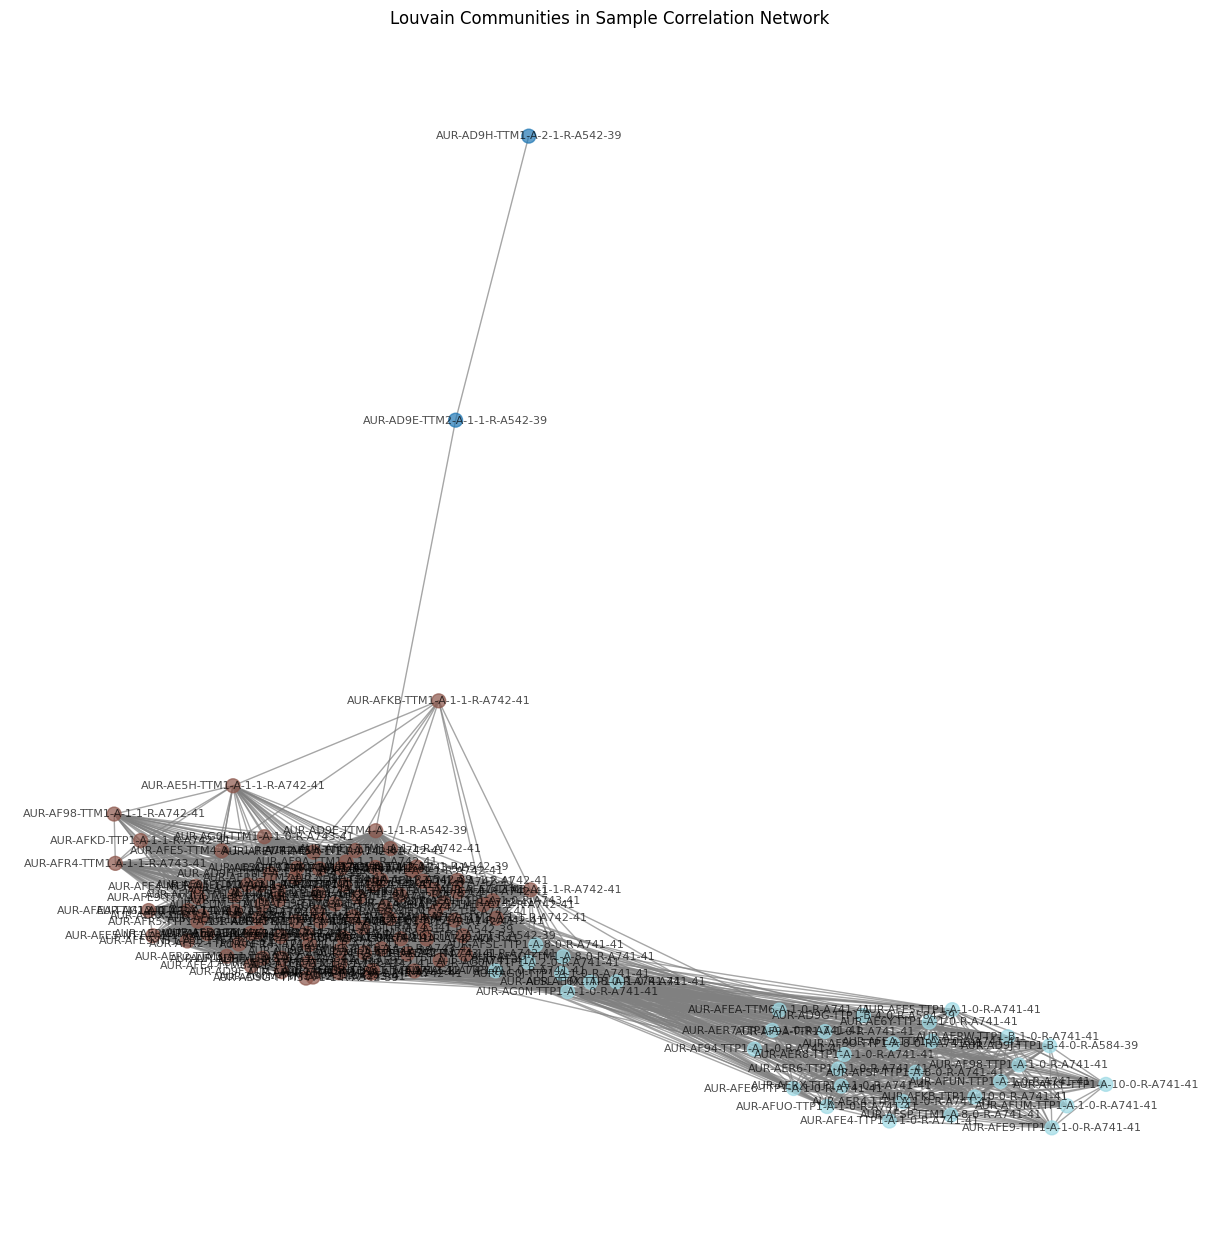

In [12]:
# Generate visualizations
plot_network(G, communities)

### Conclusion

In this project, a network-based approach was applied to RNA-seq gene expression data from **primary and matched metastatic breast tumors (GSE209998)** to explore gene–gene relationships. By constructing a correlation-based gene network and applying the **Louvain community detection algorithm**, groups of co-expressed genes were identified, revealing underlying modular structure in the data. The modularity score indicated modest but meaningful community organization, reflecting the biological complexity and heterogeneity of cancer expression profiles. Overall, this analysis demonstrates how **network analysis and community detection** can be effectively used in bioinformatics to uncover patterns in high-dimensional gene expression data and generate insights for further functional or pathway-level investigation.